**Model Building:-**

**Importing dataset and library**

In [7]:
import pandas as pd


**Reading CSV File**

In [8]:
dataframe = pd.read_csv("G:/VS_Code/Churn_analysis/tel_churn.csv")
dataframe.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


**Importing Libraries**

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

Dropping Unnamed column fron the dataset:-

In [10]:
dataframe = dataframe.drop('Unnamed: 0',axis=1)

In [11]:
x = dataframe.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [12]:
y = dataframe['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

Splitting the dataset into test and train set:-

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

Calculating the Gini and the prediction by using DecisionTreeClassifier:-

In [14]:
clf_entropy = DecisionTreeClassifier(criterion = 'gini', random_state=100, max_depth = 6, min_samples_leaf = 8)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [15]:
y_predict = clf_entropy.predict(x_test)
y_predict

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

Checking performance of the model:-

In [16]:
print(accuracy_score(y_test, y_predict))

0.7862559241706161


In [17]:
print(classification_report(y_test, y_predict , labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1541
           1       0.63      0.51      0.56       569

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [18]:
print(confusion_matrix(y_test, y_predict))

[[1371  170]
 [ 281  288]]


Plotting Decision Tree:-

In [19]:
from matplotlib import pyplot as plt

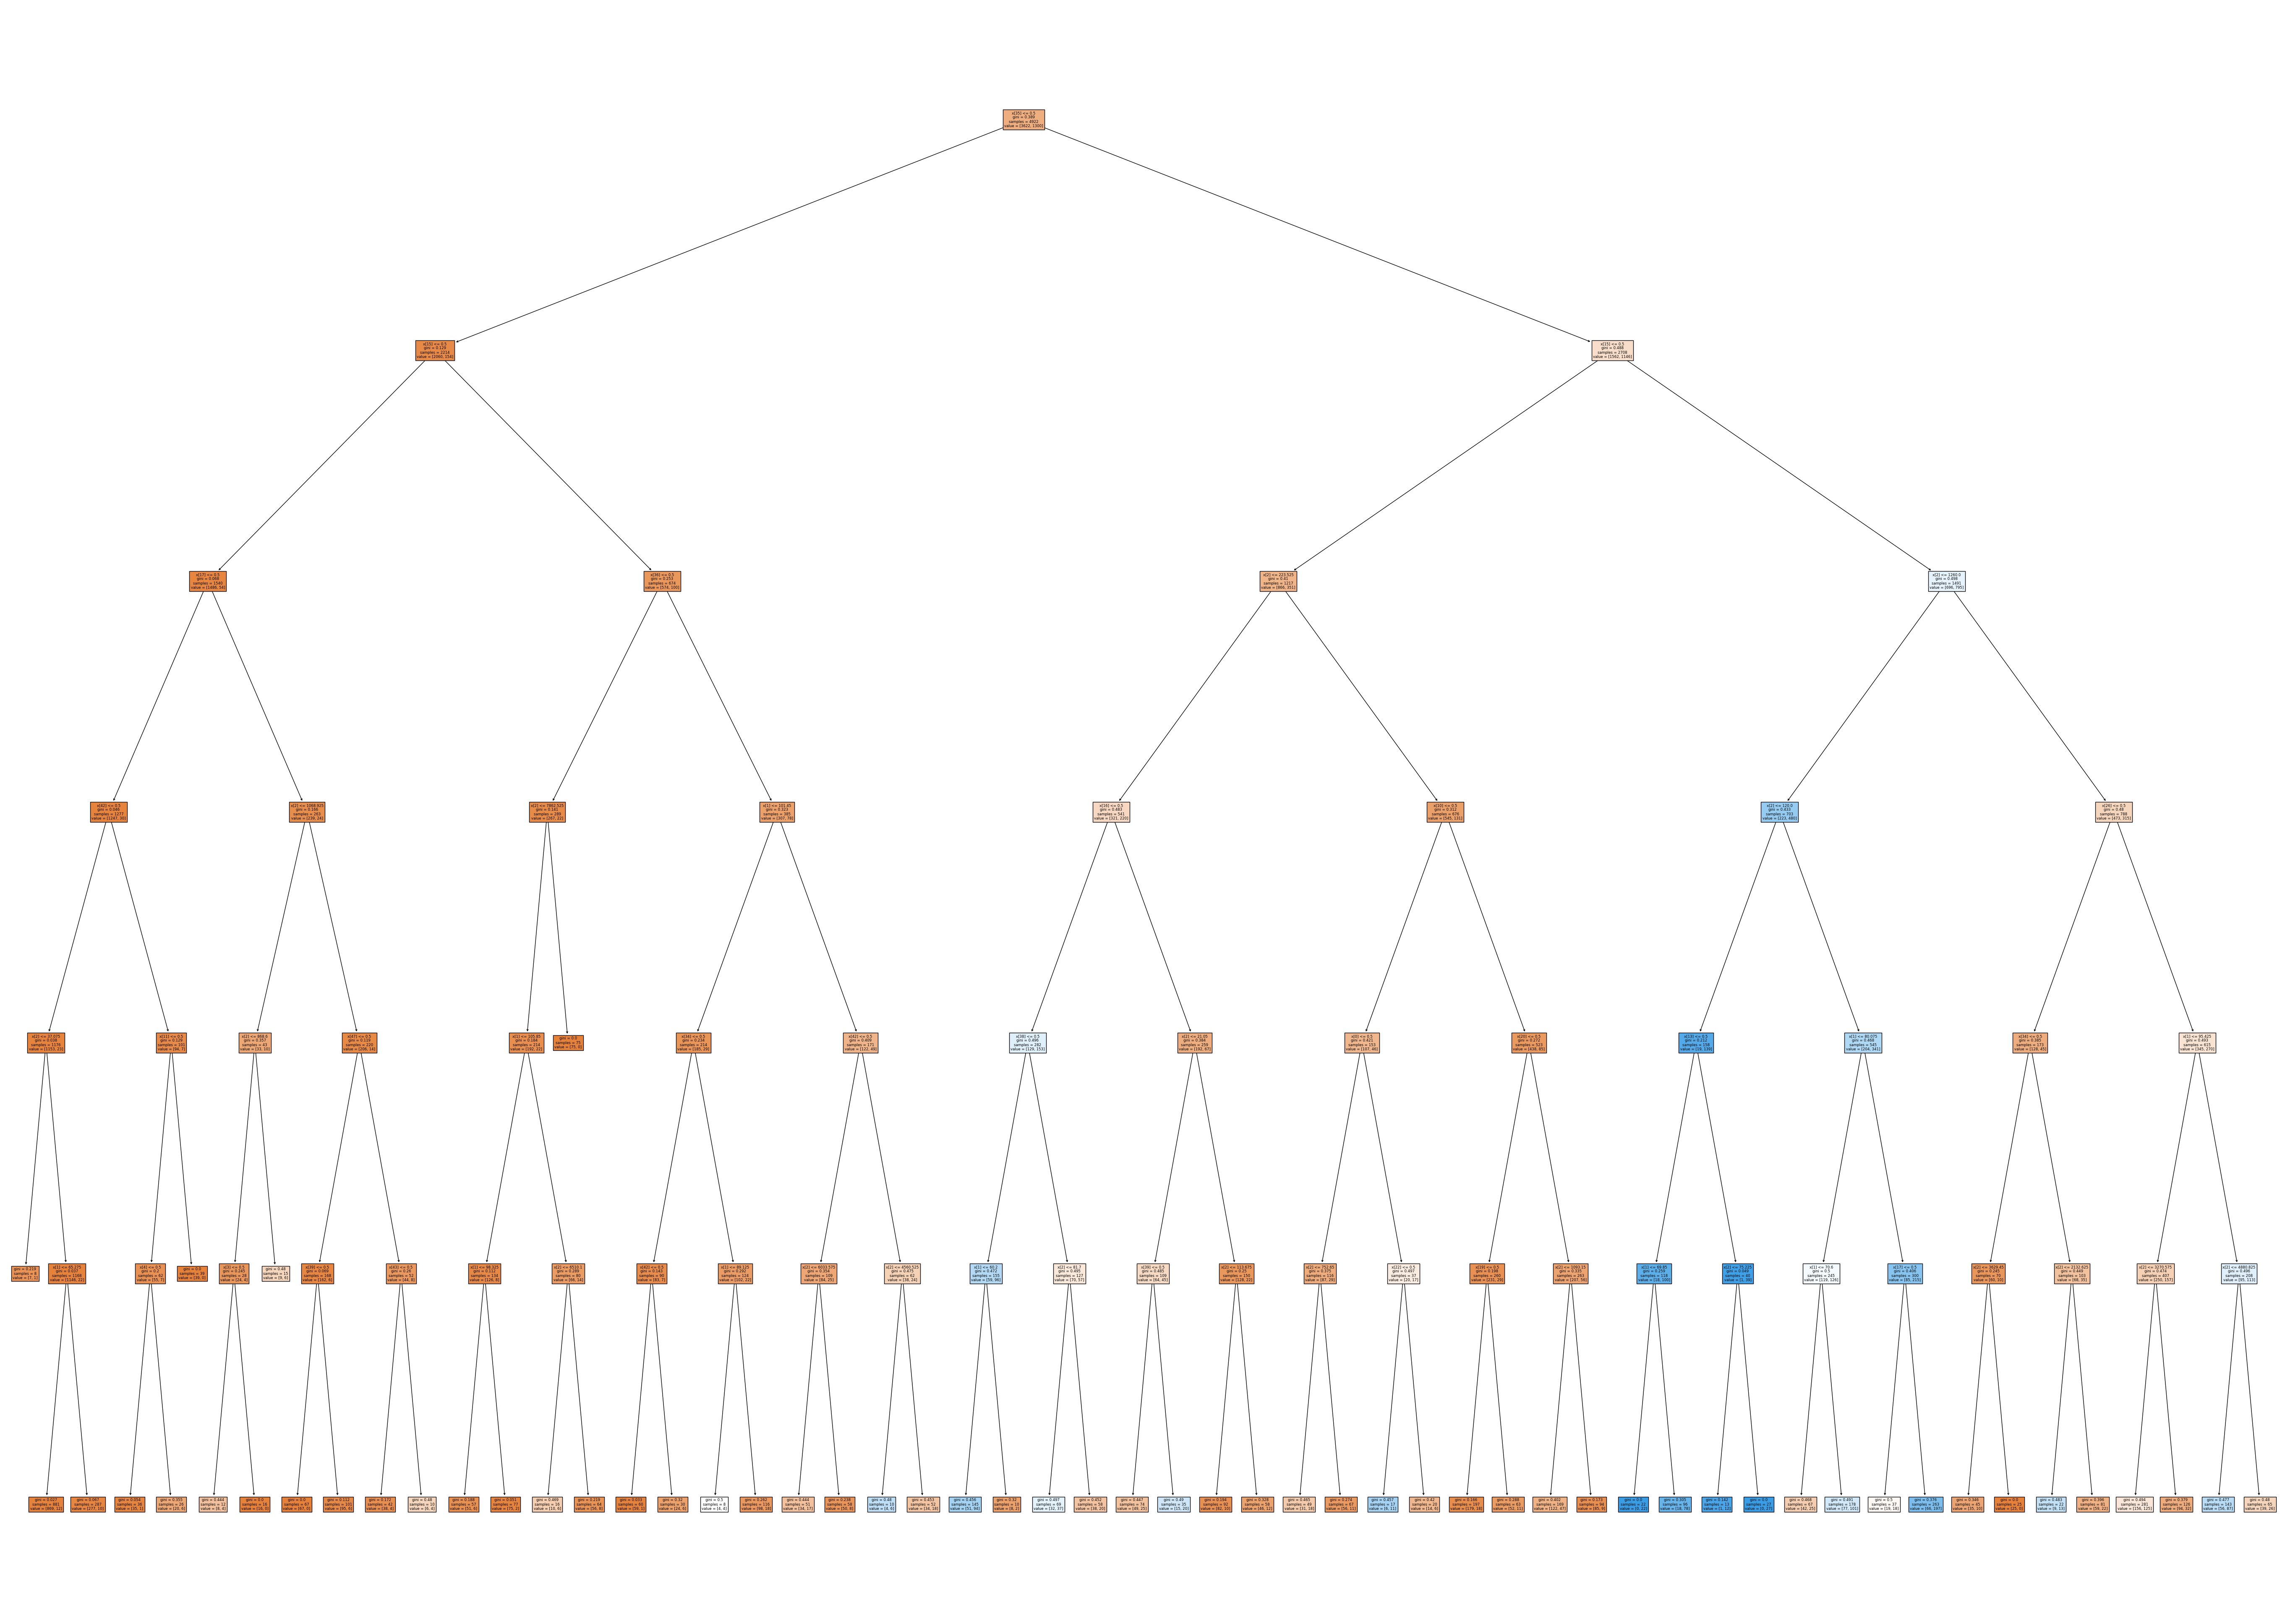

In [20]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(clf_entropy, filled=True)
fig.savefig("Customer_Churn1.png")


As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [21]:
sme = SMOTEENN(random_state=42)
x_res, y_res = sme.fit_resample(x, y)

Train Test Split:-

In [22]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_res, y_res,test_size=0.2)

In [23]:
clf_entropy_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [24]:
clf_entropy_smote.fit(xr_train,yr_train)
yr_predict = clf_entropy_smote.predict(xr_test)
model_score_r = clf_entropy_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9103214890016921
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       534
           1       0.89      0.95      0.92       648

    accuracy                           0.91      1182
   macro avg       0.91      0.91      0.91      1182
weighted avg       0.91      0.91      0.91      1182



In [25]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[460  74]
 [ 32 616]]


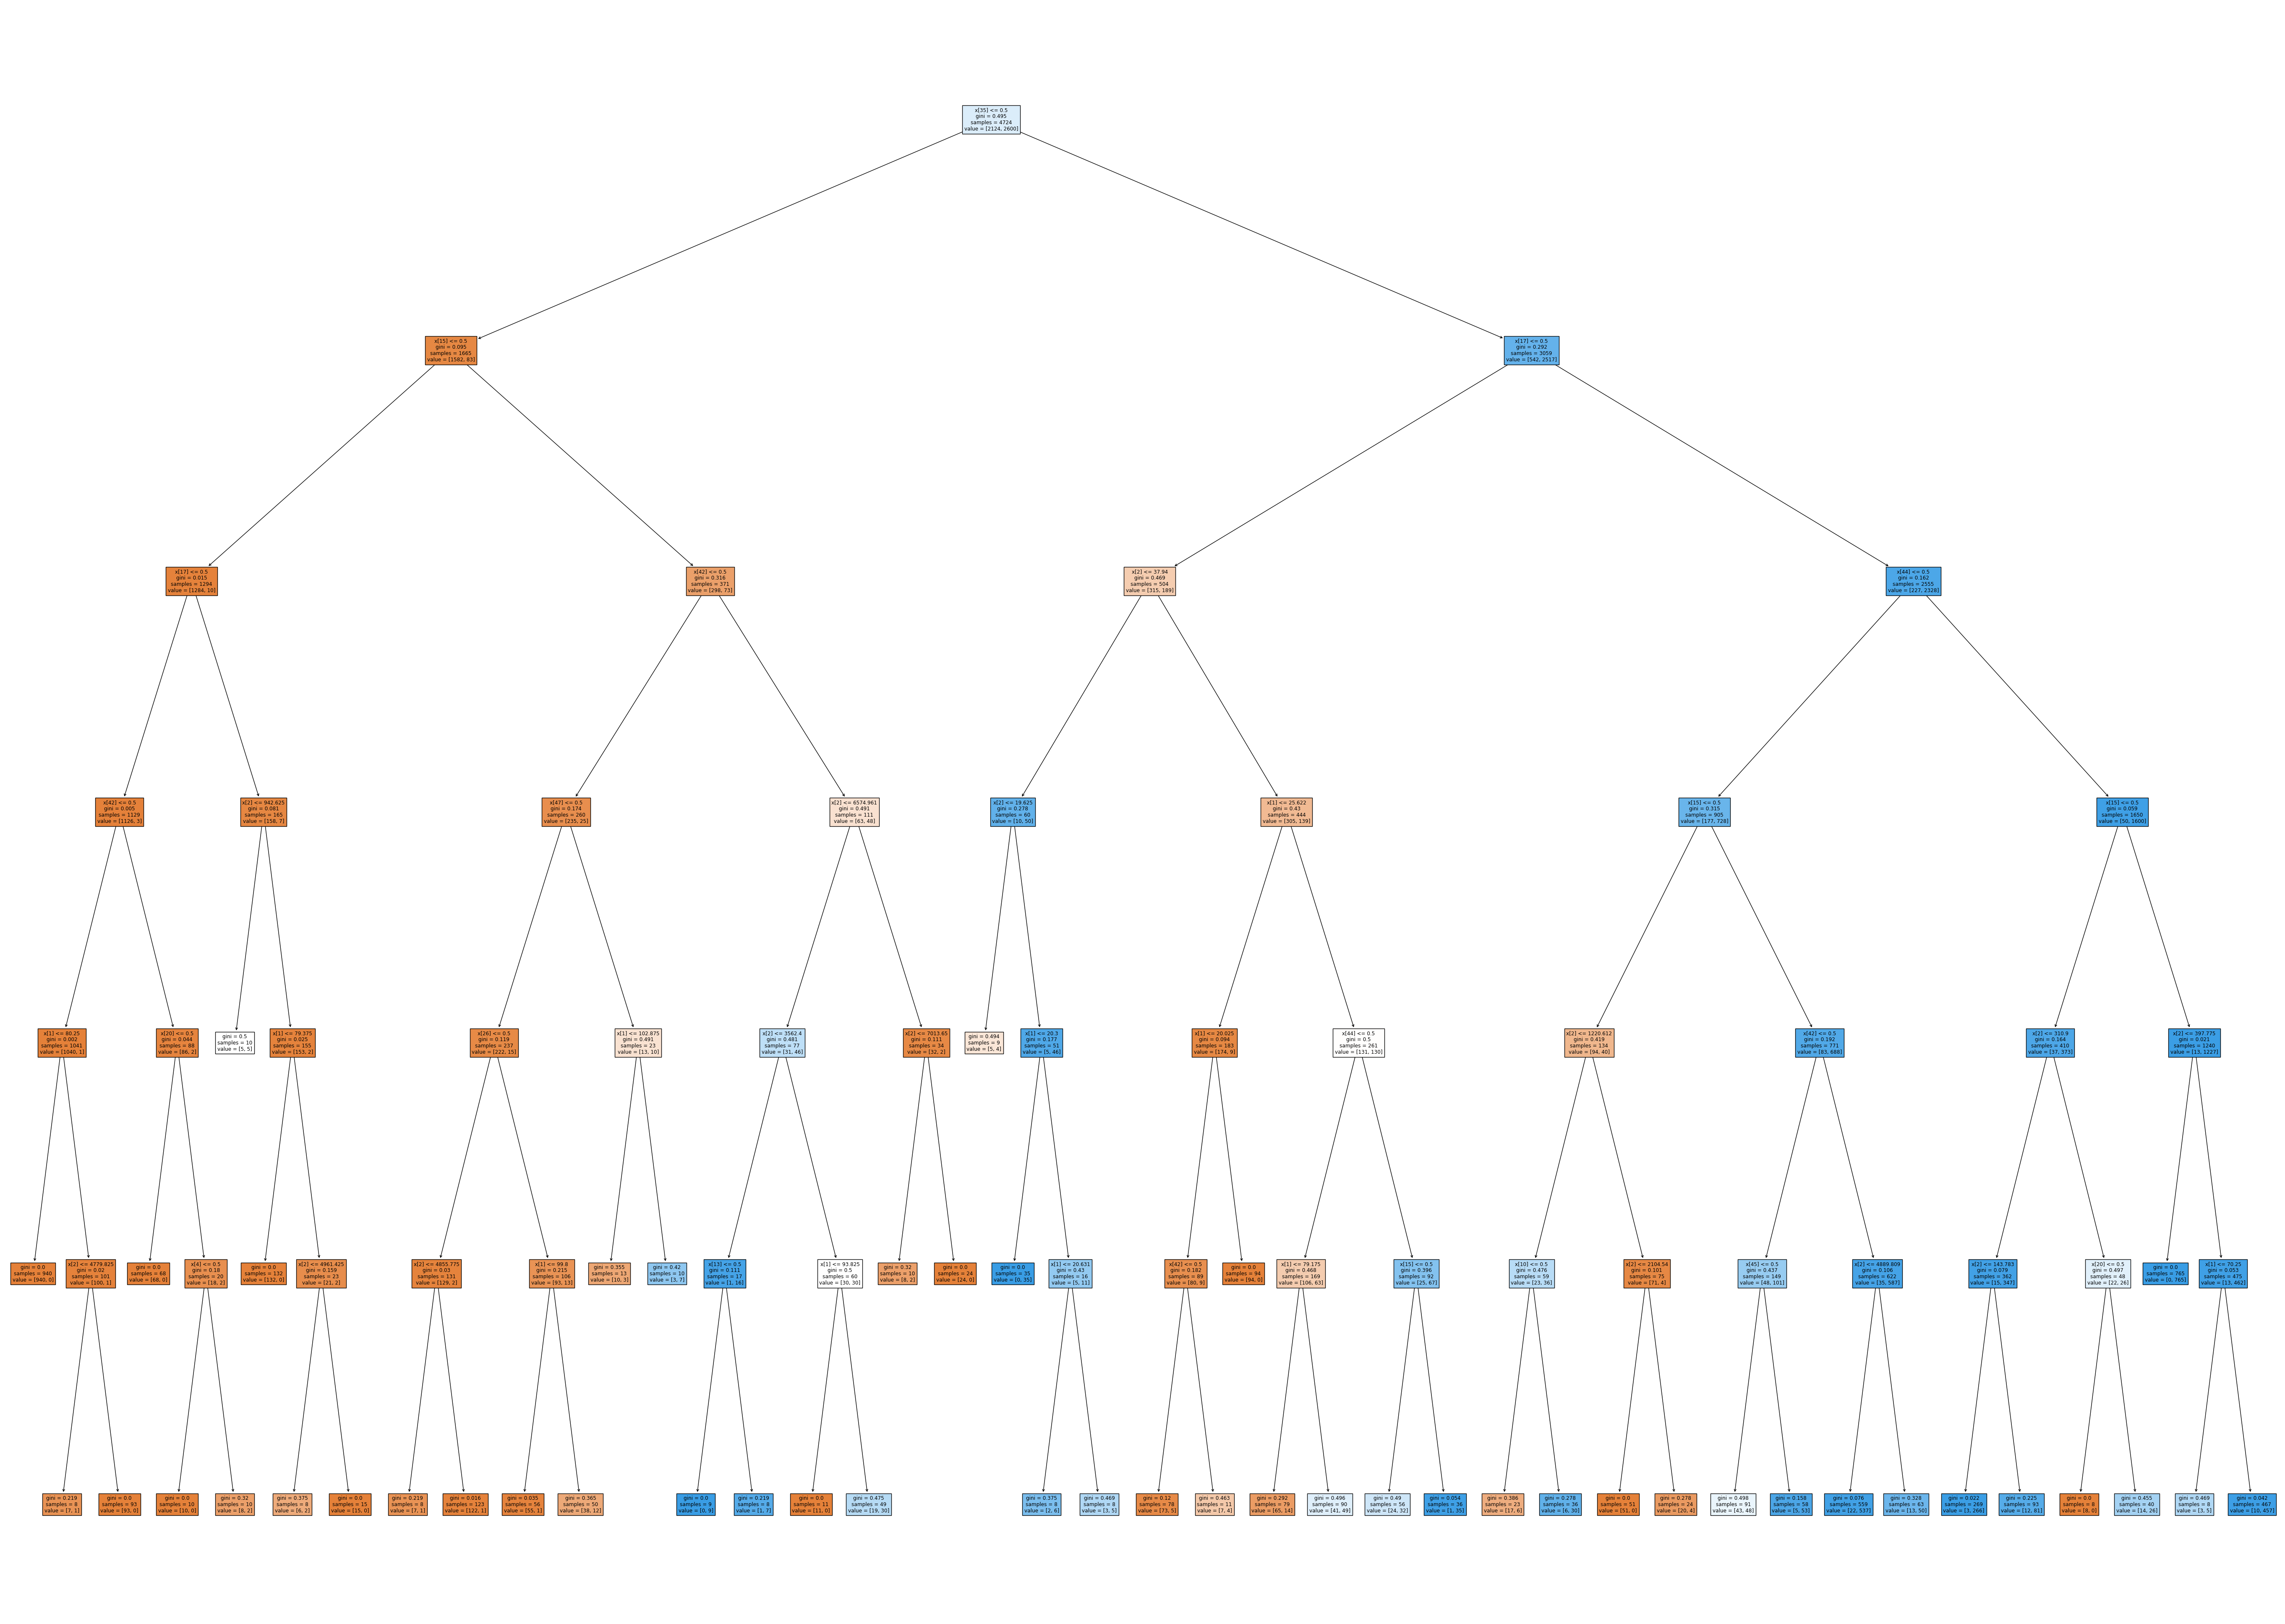

In [26]:
fig = plt.figure(figsize=(70,50))
_ = tree.plot_tree(clf_entropy_smote, filled=True)
fig.savefig("Customer_Churn2.png")

Now we can see quite better results, i.e. Accuracy: 91 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

**Random Forest Classifier:-**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [30]:
y_pred=clf.predict(x_test)

In [31]:
clf.score(x_test,y_test)

0.8018957345971564

In [32]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1541
           1       0.71      0.44      0.55       569

    accuracy                           0.80      2110
   macro avg       0.77      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



Plotting RandomForesttTree:-

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

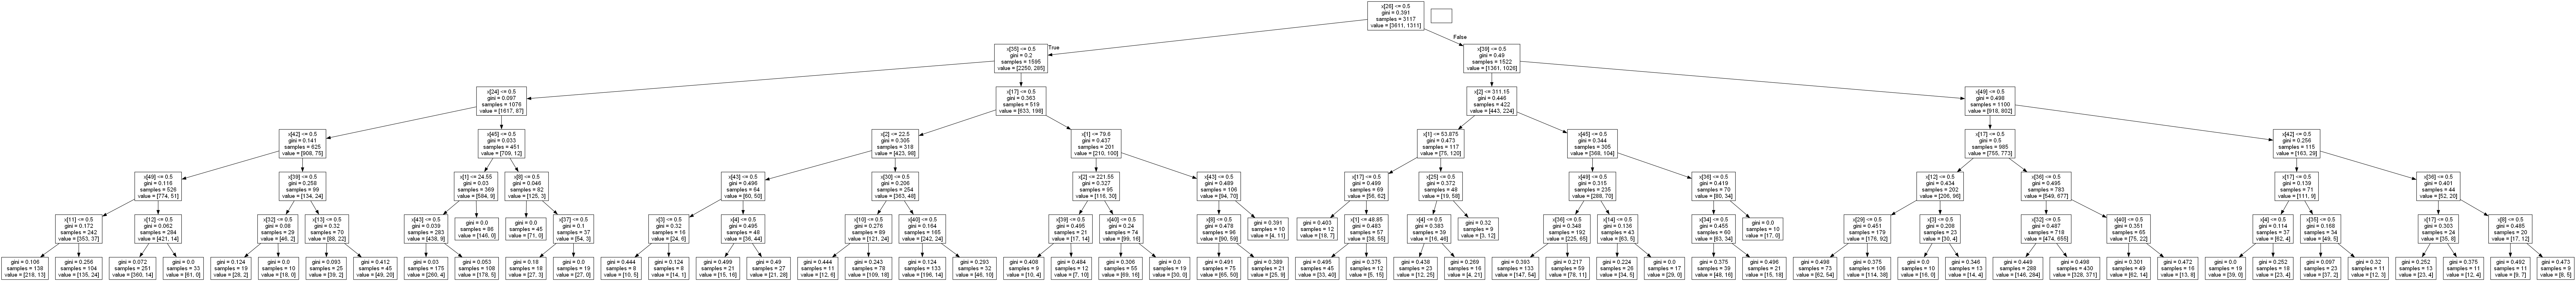

In [37]:
i_tree = 0
dot_data = StringIO()
for tree_in_forest in clf.estimators_:#rfc random forest classifier
    if (i_tree ==4):
        export_graphviz(tree_in_forest, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    i_tree = i_tree + 1
Image(graph.create_png())

Using SMOTEENN for Upsampling and cleaning using ENN:-

In [38]:
sm = SMOTEENN(random_state=45)
x_res1, y_res1 = sm.fit_resample(x, y)

In [39]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(x_res1, y_res1,test_size=0.3)


In [40]:
clf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [41]:
clf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [42]:
yr_predict1 = clf_smote.predict(xr_test1)

In [43]:
model_score_r1 = clf_smote.score(xr_test1, yr_test1)

In [44]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9376063528077141
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       772
           1       0.93      0.96      0.95       991

    accuracy                           0.94      1763
   macro avg       0.94      0.94      0.94      1763
weighted avg       0.94      0.94      0.94      1763



In [45]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[706  66]
 [ 44 947]]


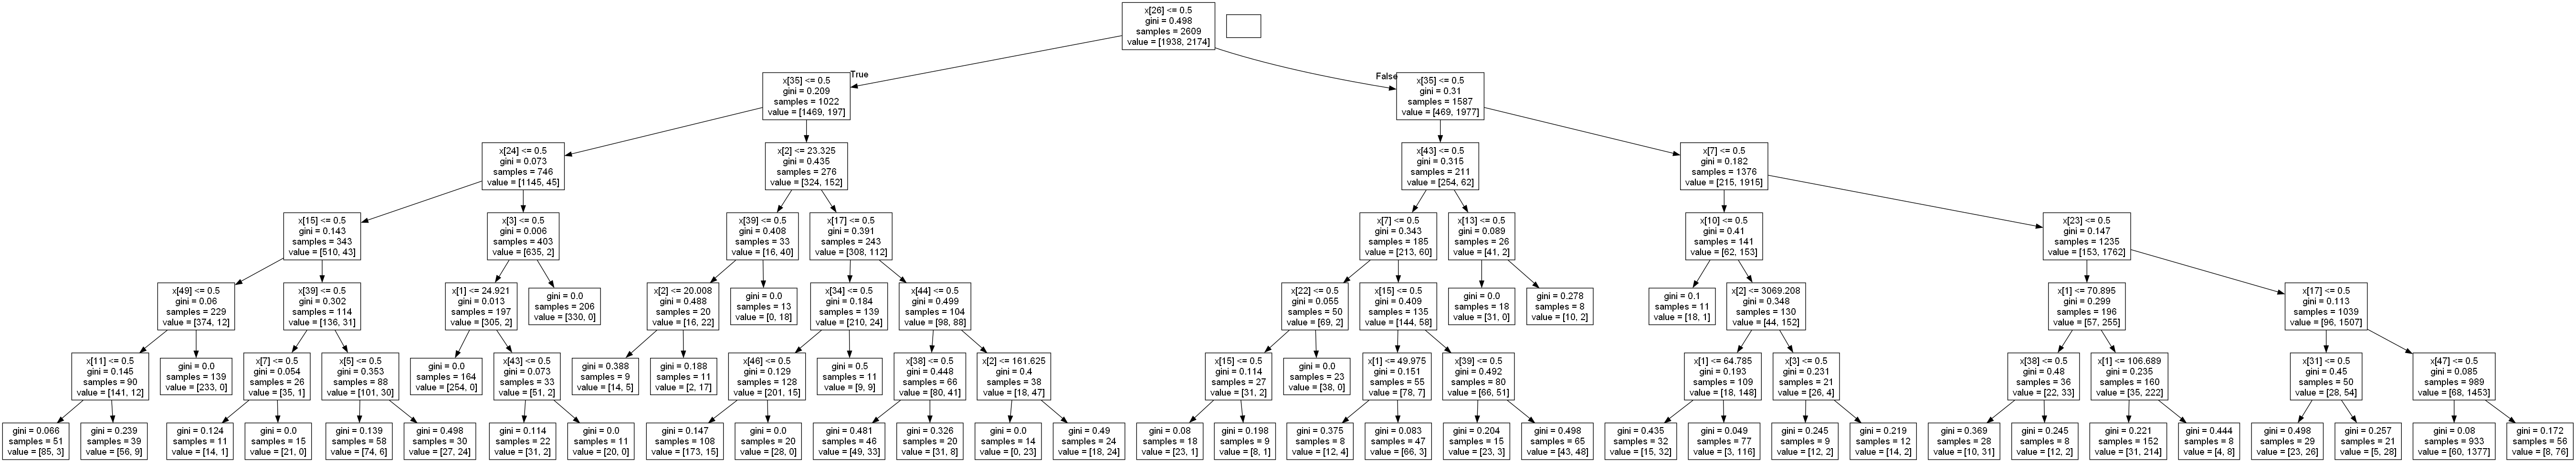

In [46]:
i_tree = 0
dot_data = StringIO()
for tree_in_forest in clf_smote.estimators_:#rfc random forest classifier
    if (i_tree ==4):
        export_graphviz(tree_in_forest, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    i_tree = i_tree + 1
Image(graph.create_png())

With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

**Performing PCA(Principal Component Anlysis):-**

In [47]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [48]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [49]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [50]:
yr_predict_pca = model.predict(xr_test_pca)

In [51]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [52]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7385138967668746
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       772
           1       0.74      0.84      0.78       991

    accuracy                           0.74      1763
   macro avg       0.74      0.72      0.73      1763
weighted avg       0.74      0.74      0.73      1763



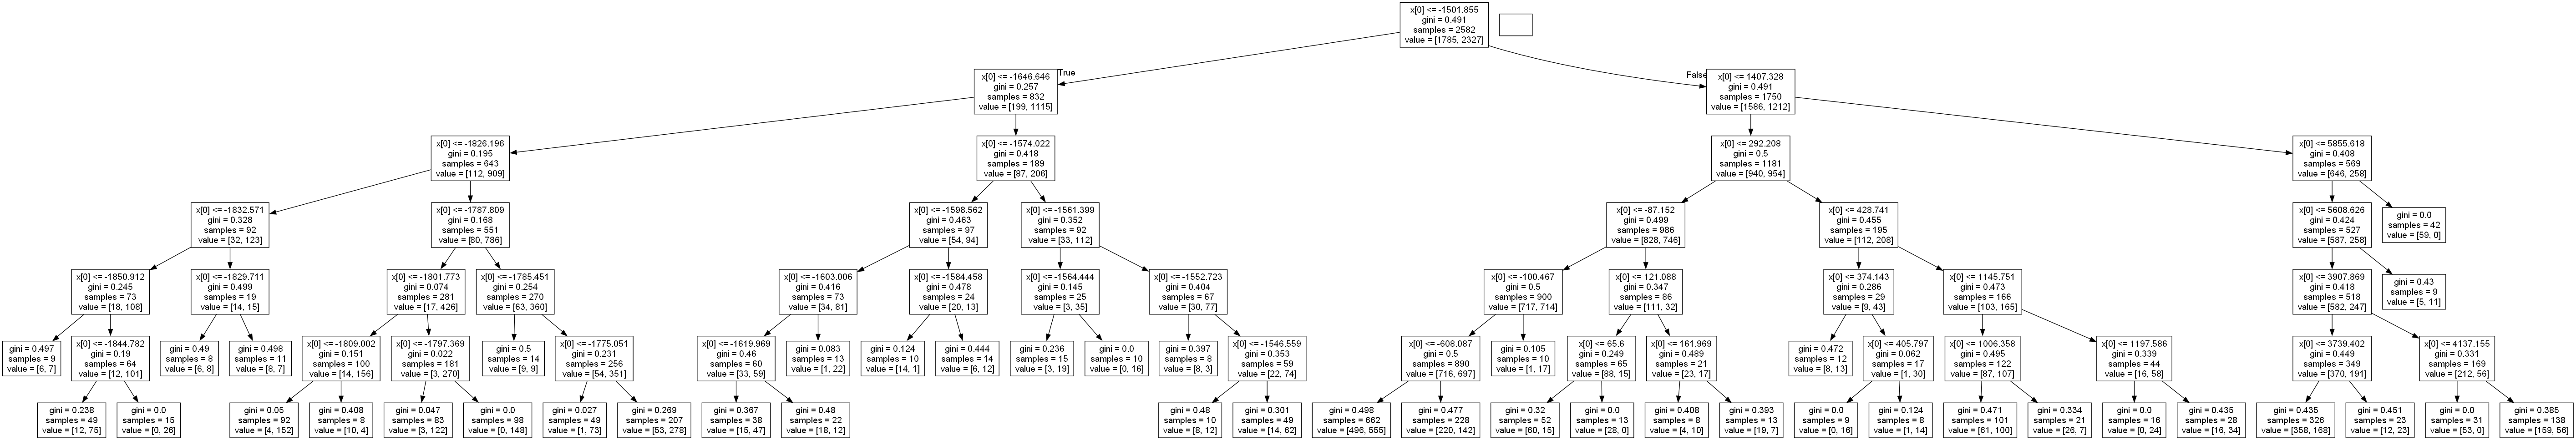

In [53]:
i_tree = 0
dot_data = StringIO()
for tree_in_forest in model.estimators_:#rfc random forest classifier
    if (i_tree ==3):
        export_graphviz(tree_in_forest, out_file=dot_data)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    i_tree = i_tree + 1
Image(graph.create_png())

With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier.

**Pickling the model:-**

In [54]:
import pickle
filename = 'model.sav'

In [55]:
pickle.dump(clf_smote, open(filename, 'wb'))

In [56]:
load_model = pickle.load(open(filename, 'rb'))

In [57]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [58]:
model_score_r1

0.9376063528077141

The final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.